# Simluations

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from models import *
from opt import encode
from tqdm import tnrange
from simulations.exp_radvansky import make_task, batch

sns.set_context('paper', font_scale=1.5)

Using TensorFlow backend.


TensorFlow Version: 1.9.0
Keras      Version: 2.2.0
TensorFlow Check Passed


In [2]:
# set the parameters, all of them!

# SEM parameters
df0 = 1.0
scale0 = .2

mode = df0 * scale0 / (df0 + 2)
print("Prior variance (mode): {}".format(mode))

lmda = 10.0  # stickyness parameter
alfa = 1.  # concentration parameter

f_class = GRUEvent
f_opts=dict(var_scale0=scale0, var_df0=df0)

# create the corrupted memory trace
# noise parameters
b = 2
tau = 0.1
print("tau: {}".format(tau))

# set the parameters for the Gibbs sampler
gibbs_kwargs = dict(
    memory_alpha = alfa,
    memory_lambda = lmda,
    memory_epsilon = np.exp(-20),
    b = b,  # re-defined here for completeness
    tau = tau,  # ibid
    n_samples = 250,
    n_burnin = 100,
    n_chains = 3,
    progress_bar=False,
)
sem_kwargs = dict(lmda=lmda, alfa=alfa, f_class=f_class, f_opts=f_opts)

epsilon_e_switch = 0.25
epsilon_e_noswitch = 0.75


Prior variance (mode): 0.0666666666667
tau: 0.1


In [3]:
# load simulations from memory
res = pd.read_pickle('simulations/saved_simulations/radvansky_sims.pkl')

In [4]:
## Uncomment the code below to re-run the simluations
## the simulations can take a long time to run (~a day on a modern laptop)

# from tqdm import tnrange
# res = []
# n_batch = 25
# n_rooms = 25

# for ii in tnrange(n_batch):
#     res0 = batch(sem_kwargs, gibbs_kwargs, epsilon_e_switch=epsilon_e_switch, 
#                  epsilon_e_noswitch=epsilon_e_noswitch, n_rooms=n_rooms)
#     res0['Itteration'] = ii
#     if len(res) > 0:
#         res = pd.concat([res, res0])
#     else:
#         res = res0    

In [5]:
df = res.groupby(['Condition', 'Itteration']).mean()
df.groupby('Condition').mean()

,Last Room Reconstruction Acc,Pr(A > B),Reconstruction Accuracy,Reconstruction Segementation,Room Number
Condition,,,,,
No-Switch,0.534935,0.4352,0.551780,0.551896,12
Switch,0.465503,0.4448,0.483065,0.386179,12


/Users/nicholasfranklin/anaconda3/envs/sem/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


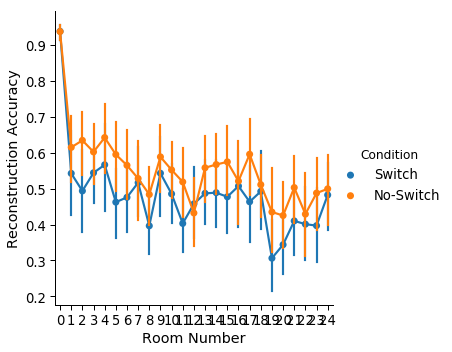

In [6]:
sns.catplot(data=res,x='Room Number', y='Reconstruction Accuracy', hue='Condition', kind='point')

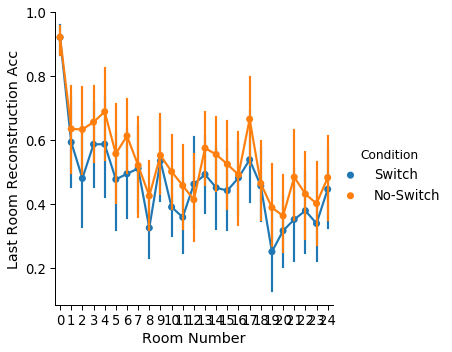

In [7]:
sns.catplot(data=res,x='Room Number', y='Last Room Reconstruction Acc', hue='Condition', kind='point')

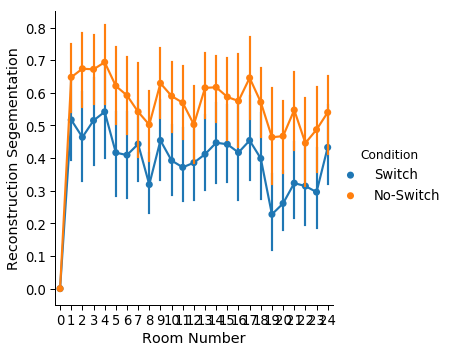

In [8]:
sns.catplot(data=res,x='Room Number', y='Reconstruction Segementation', hue='Condition', kind='point')

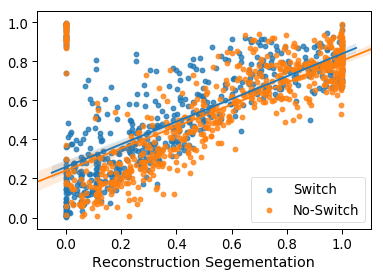

In [9]:
x = res.loc[res.Condition == 'Switch', 'Reconstruction Segementation']
y = res.loc[res.Condition == 'Switch', 'Reconstruction Accuracy'].values
sns.regplot(x, y, label='Switch')
x = res.loc[res.Condition == 'No-Switch', 'Reconstruction Segementation']
y = res.loc[res.Condition == 'No-Switch', 'Reconstruction Accuracy'].values
sns.regplot(x, y, label='No-Switch')
plt.legend()

In [10]:
res.groupby(['Condition', 'Itteration'])

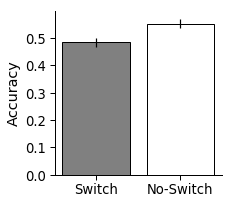

In [11]:
y = df.groupby('Condition').mean()['Reconstruction Accuracy']
y_err = df.groupby('Condition').std()['Reconstruction Accuracy'] / np.sqrt(25)
x= [1, 0]
plt.figure(figsize=(3,3))

plt.bar(x, y, color=[[1.0, 1.0, 1.0], [0.5, 0.5, 0.5]], edgecolor='k', linewidth=1)
plt.errorbar(x, y, y_err, linestyle="None", color='k')

plt.xticks([0, 1], ['Switch', 'No-Switch'])
plt.ylabel('Accuracy')
sns.despine()
plt.savefig('Radvansky_new.png', bbox_inches='tight', dpi=300)